In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

df=pd.read_csv('emi_prediction_dataset.csv')
df

/var/folders/dq/gcp3r5b912169kz3hx5tbb4r0000gn/T/ipykernel_10456/3271132675.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('emi_prediction_dataset.csv')


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27.0,Male,Married,Graduate,32400.0,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,38.0,Male,Married,Post Graduate,49200.0,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,32.0,Male,Single,Graduate,25700.0,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,48.0,Male,Married,Graduate,47200.0,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [3]:
df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [4]:
df.describe()

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


In [5]:
df['age'].unique()

array([38.0, 58.0, 48.0, 32.0, 27.0, 47.0, 37.0, 31.0, 59.0, 49.0, 33.0,
       26.0, 39.0, 57.0, 28.0, '58', '38', '48', '32', '27', '37', '48.0',
       '33', '38.0', '49', '27.0', '31', '39', '47', '59', '32.0', '58.0',
       '57', '26', '28', '58.0.0', '39.0', '26.0', '37.0', '38.0.0',
       '32.0.0'], dtype=object)

In [6]:
# df=df.drop(columns='age')

In [7]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [8]:
# df=df.drop(columns='marital_status')

In [9]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [11]:
df['gender'].unique()

array(['Female', 'Male', 'female', 'male', 'M', 'MALE', 'F', 'FEMALE'],
      dtype=object)

In [12]:
# df['gender']=df['gender'].str.replace('F,FEMALE,','female')
gender_conversion={
    'Female':'Female',
    'F':'Female',
    'female':'Female',
    'FEMALE':'Female',
    'Male':'Male',
    'MALE':'Male',
    'M':'Male',
    'male':'Male'
}
df['gender']=df['gender'].map(gender_conversion)

In [13]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['gender'].isnull().sum()

np.int64(0)

In [15]:
df['education'].unique()

array(['Professional', 'Graduate', 'High School', 'Post Graduate', nan],
      dtype=object)

In [16]:
df['education'].isnull().sum()

np.int64(2404)

In [17]:
df['education'] = df['education'].fillna('Unknown')

In [18]:
df['education'].value_counts(dropna=False)

education
Graduate         181015
Post Graduate    100314
High School       60732
Professional      60335
Unknown            2404
Name: count, dtype: int64

In [19]:
df['monthly_salary']

0         82600.0
1         21500.0
2         86100.0
3         66800.0
4         57300.0
           ...   
404795    32400.0
404796    49200.0
404797    25700.0
404798    47200.0
404799    34900.0
Name: monthly_salary, Length: 404800, dtype: object

In [20]:
# Check for ','
print(df['monthly_salary'].astype(str).str.contains(',').any())

# Check for '.'
# print(df['monthly_salary'].astype(str).str.contains('\.').any())

# Check for 'rs' or '₹'
print(df['monthly_salary'].astype(str).str.contains('rs|₹', case=False).any())

False
False


In [21]:
df['monthly_salary'] = df['monthly_salary'].astype(str).str.replace(r'\..*', '', regex=True)

In [22]:
df['monthly_salary']=pd.to_numeric(df['monthly_salary'])

In [23]:
df['monthly_salary']

0         82600
1         21500
2         86100
3         66800
4         57300
          ...  
404795    32400
404796    49200
404797    25700
404798    47200
404799    34900
Name: monthly_salary, Length: 404800, dtype: int64

In [24]:
df['monthly_salary'].isnull().sum()

np.int64(0)

In [25]:
df['employment_type'].unique()

array(['Private', 'Government', 'Self-employed'], dtype=object)

In [26]:
df['years_of_employment'].head()

0    0.9
1    7.0
2    5.8
3    2.2
4    3.4
Name: years_of_employment, dtype: float64

In [27]:
df['years_of_employment'].isnull().sum()

np.int64(0)

In [28]:
df['company_type'].head()

0    Mid-size
1         MNC
2     Startup
3    Mid-size
4    Mid-size
Name: company_type, dtype: object

In [29]:
df['company_type'].unique()

array(['Mid-size', 'MNC', 'Startup', 'Large Indian', 'Small'],
      dtype=object)

In [30]:
df['company_type'].isnull().sum()

np.int64(0)

In [31]:
df['house_type'].head()

0    Rented
1    Family
2       Own
3       Own
4    Family
Name: house_type, dtype: object

In [32]:
df['house_type'].unique()

array(['Rented', 'Family', 'Own'], dtype=object)

In [33]:
df['house_type'].isnull().sum()

np.int64(0)

In [34]:
df['monthly_rent'].head()

0    20000.0
1        0.0
2        0.0
3        0.0
4        0.0
Name: monthly_rent, dtype: float64

In [35]:
df['monthly_rent'].isnull().sum()

np.int64(2426)

In [36]:
df['monthly_rent'].mean()

np.float64(5828.446490081367)

In [37]:
df[['house_type','monthly_rent']]

,house_type,monthly_rent
0,Rented,20000.0
1,Family,0.0
2,Own,0.0
3,Own,0.0
4,Family,0.0
...,...,...
404795,Rented,10400.0
404796,Own,0.0
404797,Rented,6300.0
404798,Own,0.0


In [38]:
df[(df['monthly_rent'].isnull()) & (df['house_type']=='Rented')][['house_type','monthly_rent']]

,house_type,monthly_rent
183,Rented,NaN
903,Rented,NaN
1699,Rented,NaN
2061,Rented,NaN
3034,Rented,NaN
...,...,...
403754,Rented,NaN
403811,Rented,NaN
404090,Rented,NaN
404541,Rented,NaN


In [39]:
df[(df['monthly_rent'].isnull()) & (df['house_type']=='Own')][['house_type','monthly_rent']]

,house_type,monthly_rent
116,Own,NaN
429,Own,NaN
638,Own,NaN
752,Own,NaN
1448,Own,NaN
...,...,...
402017,Own,NaN
402515,Own,NaN
402674,Own,NaN
403315,Own,NaN


In [40]:
df[(df['monthly_rent'].isnull()) & (df['house_type']=='Family')][['house_type','monthly_rent']]

,house_type,monthly_rent
226,Family,NaN
939,Family,NaN
1568,Family,NaN
1605,Family,NaN
1721,Family,NaN
...,...,...
402588,Family,NaN
402686,Family,NaN
403511,Family,NaN
404357,Family,NaN


In [41]:
df.loc[df['house_type'].isin(['Own', 'Family']) & df['monthly_rent'].isna(), 'monthly_rent'] = 0

In [42]:
median_rent = df[df['house_type'] == 'Rented']['monthly_rent'].median()
median_rent

np.float64(12500.0)

In [43]:
df.loc[(df['house_type'] == 'Rented') & df['monthly_rent'].isna(), 'monthly_rent'] = median_rent

In [44]:
df['monthly_rent'].isnull().sum()

np.int64(0)

In [45]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [46]:
df['family_size'].head()

0    3
1    2
2    4
3    5
4    4
Name: family_size, dtype: int64

In [47]:
df['family_size'].isnull().sum()

np.int64(0)

In [48]:
df['dependents'].head()

0    2
1    1
2    3
3    4
4    3
Name: dependents, dtype: int64

In [49]:
df['dependents'].isnull().sum()

np.int64(0)

In [50]:
df['school_fees'].head()

0        0.0
1     5100.0
2        0.0
3    11400.0
4     9400.0
Name: school_fees, dtype: float64

In [51]:
df['school_fees'  ].isnull().sum()

np.int64(0)

In [52]:
df['college_fees'].head()

0        0.0
1        0.0
2        0.0
3        0.0
4    21300.0
Name: college_fees, dtype: float64

In [53]:
df['college_fees'].isnull().sum()

np.int64(0)

In [54]:
df['travel_expenses'].head()

0     7200.0
1     1400.0
2    10200.0
3     6200.0
4     3600.0
Name: travel_expenses, dtype: float64

In [55]:
df['travel_expenses'].isnull().mean()

np.float64(0.0)

In [56]:
df['groceries_utilities'].head()

0    19500.0
1     5400.0
2    19400.0
3    11900.0
4    16200.0
Name: groceries_utilities, dtype: float64

In [57]:
df['groceries_utilities'].isnull().sum()

np.int64(0)

In [58]:
df['other_monthly_expenses'].head()

0    13200.0
1     3500.0
2     6000.0
3     7900.0
4     8100.0
Name: other_monthly_expenses, dtype: float64

In [59]:
df['other_monthly_expenses'].isnull().sum()

np.int64(0)

In [60]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [61]:
df['existing_loans'].head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: existing_loans, dtype: object

In [62]:
df['existing_loans'].isnull().sum()

np.int64(0)

In [63]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [64]:
df['current_emi_amount'].head(10)

0    23700.0
1     4100.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     9900.0
8        0.0
9    33100.0
Name: current_emi_amount, dtype: float64

In [65]:
df['current_emi_amount'].isnull().sum()

np.int64(0)

In [66]:
df['credit_score'].head(10)

0    660.0
1    714.0
2    650.0
3    685.0
4    770.0
5    792.0
6    741.0
7    623.0
8    712.0
9    681.0
Name: credit_score, dtype: float64

In [67]:
df['credit_score'].isnull().sum()

np.int64(2420)

In [68]:
print(df['credit_score'].mean())
print(df['credit_score'].median())
print(df['credit_score'].mode())

700.8562229733088
701.0
0    850.0
Name: credit_score, dtype: float64


In [69]:
df['credit_score']=df['credit_score'].fillna(df['credit_score'].mean())

In [70]:
df['credit_score'].isnull().sum()

np.int64(0)

In [71]:
df['bank_balance'].head(10)

0    303200.0
1     92500.0
2    672100.0
3    440900.0
4     97300.0
5    260800.0
6     68000.0
7    184600.0
8    235600.0
9    963200.0
Name: bank_balance, dtype: object

In [72]:
df['bank_balance'] = df['bank_balance'].astype(str).str.replace(r'\..*', '', regex=True)
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
# df['bank_balance'] = df['bank_balance'].fillna(df['bank_balance'].mean())

In [73]:
df['bank_balance'].isnull().sum()

np.int64(2440)

In [74]:
print(df['bank_balance'].mean())
print(df['bank_balance'].median())
print(df['bank_balance'].mode())

241688.96808827916
196000.0
0    115800.0
Name: bank_balance, dtype: float64


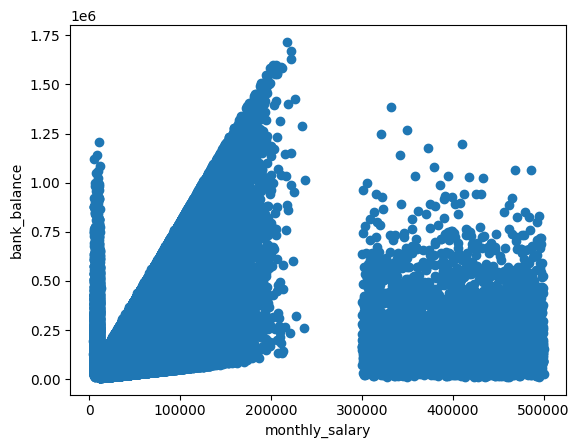

In [75]:
from matplotlib import pyplot as plt
plt.scatter(df['monthly_salary'],df['bank_balance'])

plt.xlabel('monthly_salary')
plt.ylabel('bank_balance')
plt.show()

In [76]:
df['bank_balance']=df['bank_balance'].fillna(df['bank_balance'].median())

In [77]:
df['bank_balance'].isnull().sum()

np.int64(0)

In [78]:
df['emergency_fund']

0          70200.0
1          26900.0
2         324200.0
3         178100.0
4          28200.0
            ...   
404795     32600.0
404796     38100.0
404797     39700.0
404798     45600.0
404799     99400.0
Name: emergency_fund, Length: 404800, dtype: float64

In [79]:
df['emergency_fund'].isnull().sum()

np.int64(2351)

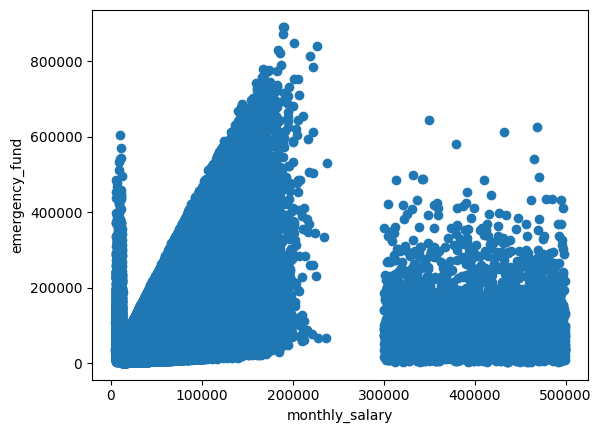

In [80]:
plt.scatter(df['monthly_salary'],df['emergency_fund'])

plt.xlabel('monthly_salary')
plt.ylabel('emergency_fund')
plt.show()

In [81]:
print(df['emergency_fund'].mean())
print(df['emergency_fund'].median())
print(df['emergency_fund'].mode())

96769.05173077832
74000.0
0    29100.0
Name: emergency_fund, dtype: float64


<Axes: xlabel='emergency_fund', ylabel='Count'>

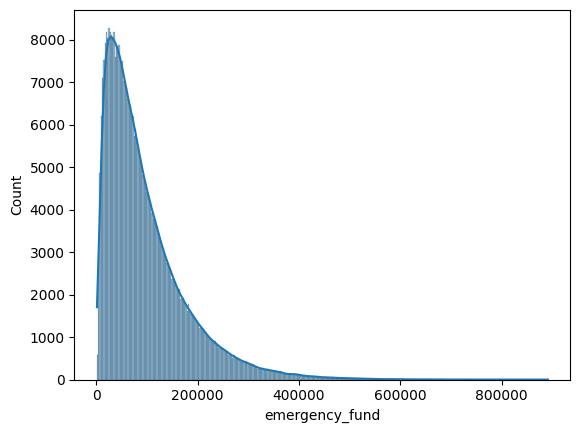

In [82]:
import seaborn as sns
sns.histplot(df['emergency_fund'],kde=True)

In [83]:
df['emergency_fund'].describe()

count    402449.000000
mean      96769.051731
std       81373.053976
min        1400.000000
25%       38400.000000
50%       74000.000000
75%      130600.000000
max      891500.000000
Name: emergency_fund, dtype: float64

In [84]:
df['emergency_fund']=df['emergency_fund'].fillna(df['emergency_fund'].median())

In [85]:
df['emergency_fund'].isnull().sum()

np.int64(0)

In [86]:
df

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27.0,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,38.0,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,32.0,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,48.0,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0


In [87]:
df['emi_scenario'].head()

0          Personal Loan EMI
1    E-commerce Shopping EMI
2              Education EMI
3                Vehicle EMI
4        Home Appliances EMI
Name: emi_scenario, dtype: object

In [88]:
df['emi_scenario'].isnull().sum()

np.int64(0)

In [89]:
df['emi_scenario']=df['emi_scenario'].dropna()

In [90]:
df['emi_scenario'].isnull().sum()

np.int64(0)

In [91]:
df['emi_scenario'].unique()

array(['Personal Loan EMI', 'E-commerce Shopping EMI', 'Education EMI',
       'Vehicle EMI', 'Home Appliances EMI'], dtype=object)

In [92]:
df['requested_amount']

0         850000.0
1         128000.0
2         306000.0
3         304000.0
4         252000.0
            ...   
404795    506000.0
404796    708000.0
404797     93000.0
404798    144000.0
404799     77000.0
Name: requested_amount, Length: 404800, dtype: float64

In [93]:
df['requested_amount'].isnull().sum()

np.int64(0)

In [94]:
df['requested_tenure']

0         15
1         19
2         16
3         83
4          7
          ..
404795    47
404796    33
404797    21
404798    36
404799    35
Name: requested_tenure, Length: 404800, dtype: int64

In [95]:
df['requested_tenure'].isnull().sum()

np.int64(0)

In [96]:
df['emi_eligibility']

0         Not_Eligible
1         Not_Eligible
2             Eligible
3             Eligible
4         Not_Eligible
              ...     
404795    Not_Eligible
404796    Not_Eligible
404797       High_Risk
404798        Eligible
404799        Eligible
Name: emi_eligibility, Length: 404800, dtype: object

In [97]:
df['emi_eligibility'].isnull().sum()

np.int64(0)

In [98]:
df['max_monthly_emi']

0           500.0
1           700.0
2         27775.0
3         16170.0
4           500.0
           ...   
404795      500.0
404796     5200.0
404797     5665.0
404798    14460.0
404799     8756.0
Name: max_monthly_emi, Length: 404800, dtype: float64

In [99]:
df['max_monthly_emi'].isnull().sum()

np.int64(0)

In [100]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [101]:
print(df['gender'].unique())
print(df['marital_status'].unique())
print(df['education'].unique())
print(df['employment_type'].unique())
print(df['company_type'].unique())
print(df['house_type'].unique())
print(df['emi_scenario'].unique())
print(df['emi_eligibility'].unique())

['Female' 'Male']
['Married' 'Single']
['Professional' 'Graduate' 'High School' 'Post Graduate' 'Unknown']
['Private' 'Government' 'Self-employed']
['Mid-size' 'MNC' 'Startup' 'Large Indian' 'Small']
['Rented' 'Family' 'Own']
['Personal Loan EMI' 'E-commerce Shopping EMI' 'Education EMI'
 'Vehicle EMI' 'Home Appliances EMI']
['Not_Eligible' 'Eligible' 'High_Risk']


In [102]:
cat_cols=['gender', 'marital_status', 'education', 'employment_type','company_type', 'house_type', 
          'emi_scenario', 'emi_eligibility'] 


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               404800 non-null  object 
 4   monthly_salary          404800 non-null  int64  
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            404800 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [104]:
df.isnull().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [105]:
for col in cat_cols:
    df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     404800 non-null  object  
 1   gender                  404800 non-null  category
 2   marital_status          404800 non-null  category
 3   education               404800 non-null  category
 4   monthly_salary          404800 non-null  int64   
 5   employment_type         404800 non-null  category
 6   years_of_employment     404800 non-null  float64 
 7   company_type            404800 non-null  category
 8   house_type              404800 non-null  category
 9   monthly_rent            404800 non-null  float64 
 10  family_size             404800 non-null  int64   
 11  dependents              404800 non-null  int64   
 12  school_fees             404800 non-null  float64 
 13  college_fees            404800 non-null  float64 
 14  trav

In [106]:
df['age'].head()

0    38.0
1    38.0
2    38.0
3    58.0
4    48.0
Name: age, dtype: object

In [107]:
df['age'].isnull().sum()

np.int64(0)

In [108]:
# df['age']=df['age'].str.replace('\..*','.0',regex=True)
df['age'] = df['age'].astype(str).str.replace(r'\..*', '', regex=True)

In [109]:
df['age']=pd.to_numeric(df['age'])

In [110]:
df['age']

0         38
1         38
2         38
3         58
4         48
          ..
404795    27
404796    38
404797    32
404798    48
404799    38
Name: age, Length: 404800, dtype: int64

In [111]:
df['age'].isnull().sum()

np.int64(0)

In [112]:
df['existing_loans']

0         Yes
1         Yes
2          No
3          No
4          No
         ... 
404795     No
404796     No
404797     No
404798     No
404799     No
Name: existing_loans, Length: 404800, dtype: object

In [113]:
df['existing_loans'].unique()

array(['Yes', 'No'], dtype=object)

In [114]:
df['existing_loans']=df['existing_loans'].astype('category')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     404800 non-null  int64   
 1   gender                  404800 non-null  category
 2   marital_status          404800 non-null  category
 3   education               404800 non-null  category
 4   monthly_salary          404800 non-null  int64   
 5   employment_type         404800 non-null  category
 6   years_of_employment     404800 non-null  float64 
 7   company_type            404800 non-null  category
 8   house_type              404800 non-null  category
 9   monthly_rent            404800 non-null  float64 
 10  family_size             404800 non-null  int64   
 11  dependents              404800 non-null  int64   
 12  school_fees             404800 non-null  float64 
 13  college_fees            404800 non-null  float64 
 14  trav

In [116]:
df.head(10)

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
5,38,Male,Married,High School,38800,Government,5.0,Large Indian,Rented,13500.0,4,3,0.0,24100.0,3400.0,8200.0,6700.0,No,0.0,792.0,260800.0,55600.0,Vehicle EMI,1257000.0,53,Not_Eligible,500.0
6,58,Male,Single,High School,27100,Private,36.0,Large Indian,Own,0.0,3,2,10200.0,0.0,1600.0,7300.0,4100.0,No,0.0,741.0,68000.0,36200.0,Home Appliances EMI,280000.0,11,Not_Eligible,1950.0
7,58,Female,Married,Post Graduate,392044,Private,12.9,MNC,Family,0.0,4,3,0.0,0.0,5600.0,12300.0,3000.0,Yes,9900.0,623.0,184600.0,61700.0,E-commerce Shopping EMI,153000.0,12,Not_Eligible,8260.0
8,58,Female,Married,Professional,47700,Private,36.0,Large Indian,Family,0.0,3,2,15000.0,0.0,6100.0,7300.0,8300.0,No,0.0,712.0,235600.0,81800.0,E-commerce Shopping EMI,106000.0,14,Not_Eligible,5500.0
9,32,Female,Single,Post Graduate,129200,Private,1.9,MNC,Family,0.0,2,1,8100.0,11300.0,11800.0,24100.0,16500.0,Yes,33100.0,681.0,963200.0,519100.0,E-commerce Shopping EMI,81000.0,3,Not_Eligible,9355.5


In [ ]:
# df.to_csv('cleaned_emi_data.csv')

In [ ]:
cleaned_data=pd.read_csv('cleaned_emi_data.csv')

In [119]:
cleaned_data

,Unnamed: 0,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,404795,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,404796,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,404797,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,404798,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0


In [120]:
df

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,3,2,0.0,0.0,7200.0,19500.0,13200.0,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,2,1,5100.0,0.0,1400.0,5400.0,3500.0,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,4,3,0.0,0.0,10200.0,19400.0,6000.0,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,5,4,11400.0,0.0,6200.0,11900.0,7900.0,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,4,3,9400.0,21300.0,3600.0,16200.0,8100.0,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404795,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,4,3,2800.0,7000.0,2200.0,4900.0,6100.0,No,0.0,649.0,62000.0,32600.0,Personal Loan EMI,506000.0,47,Not_Eligible,500.0
404796,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,5,4,14000.0,0.0,2600.0,13600.0,8600.0,No,0.0,712.0,142200.0,38100.0,Personal Loan EMI,708000.0,33,Not_Eligible,5200.0
404797,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,1,0,0.0,0.0,2000.0,4600.0,2500.0,No,0.0,676.0,191600.0,39700.0,Home Appliances EMI,93000.0,21,High_Risk,5665.0
404798,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,4,3,0.0,0.0,7000.0,8900.0,7200.0,No,0.0,784.0,170400.0,45600.0,Home Appliances EMI,144000.0,36,Eligible,14460.0
